Rafał Gąsior 407326

### Linear regression with one variable

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

### 1. Use the head and describe function to examine the data and display few columns.

In [138]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [139]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [140]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 2. Extract data from pandas structure to new variables of ndarray type and plot the data, where: x - population, y - profit.

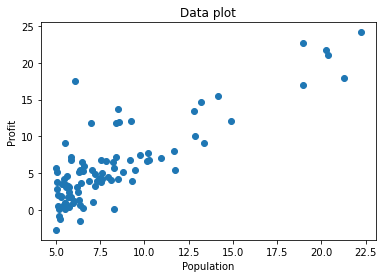

In [141]:
x = data.values[:, 0]   #populacja
y = data.values[:, 1]   #zysk

plt.scatter(x, y)
plt.title("Data plot")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

### 3. In order to make the cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the top of x.

In [142]:
data.insert(2, 'ones', 1)
data

,Population,Profit,ones
0,6.1101,17.59200,1
1,5.5277,9.13020,1
2,8.5186,13.66200,1
3,7.0032,11.85400,1
4,5.8598,6.82330,1
...,...,...,...
92,5.8707,7.20290,1
93,5.3054,1.98690,1
94,8.2934,0.14454,1
95,13.3940,9.05510,1


### 4. We need to separate our data into independent variables X and our dependent variable y. We also need to initialise parameter θ.

In [143]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)

y.shape = [1, y.shape[0]]

theta = np.zeros((X.shape[0], 1), dtype=np.float32)

### 5. The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

In [144]:
y.shape[1]

97

In [145]:
#hypothesis function
def h(X, theta):
    return theta.T@X

In [146]:
#cost function
def computeCost(x, y, theta):
    return (np.sum((h(X, theta)-y)**2)/(2*y.shape[1]))

### 6. Test the cost function with (θ=0).

In [147]:
computeCost(X, y, theta)

32.072733877455676

### 7. Please implement the gradient descent algorithm:
### the function returns optimized values θ and a vector of the cost function value for each iteration.
### Parameter initialization: alpha = 0.01, it = 1000.

In [148]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    m = X.shape[1]
    for i in range(it):
        theta_0 = theta[0, 0] - alpha * (h(X, theta) - y).sum() / m
        theta_1 = theta[1, 0] - alpha * (h(X, theta) - y) @ np.transpose(X[1, :]) / m
        theta[0, 0] = theta_0
        theta[1, 0] = theta_1
        cost.append(computeCost(X, y, theta))
    return theta, cost

### 8. Please calculate the optimal parameters for the dataset.

In [149]:
alpha = 0.01
it = 1000

theta, cost = simple_gradient(X, y, theta, alpha, it)
print(theta)
print(cost[-1])

[[-3.2414012]
 [ 1.1272942]]
4.515955615224579


### 9. Please calculate the cost function for the given θ (Ex.8).

In [150]:
computeCost(X, y, theta)

4.515955615224579

### 10. Plot the regression function and our dataset.

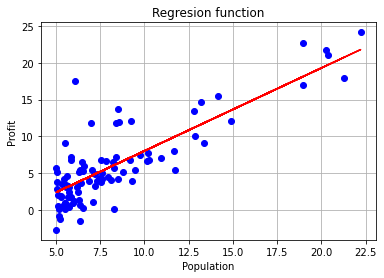

In [151]:
plt.plot("Population", "Profit", "bo", data=data)
x = data['Population']
plt.plot(x, theta[1, 0]*x + theta[0, 0], '-r')
plt.title("Regresion function")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.grid()
plt.show()

### 11. Plot the relationship between the cost function and number of iterations.

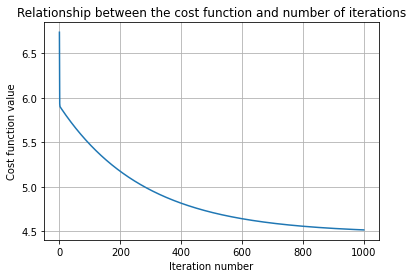

In [152]:
plt.plot(range(len(cost)), cost)
plt.title("Relationship between the cost function and number of iterations")
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.grid()
plt.show()

### Linear regression with multiple variables

In [153]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### EX. 1
Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [154]:
normalized = (data2 - data2.mean())/data2.std()
normalized.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Ex. 2
Please perform steps 3-11 from the previous task by using the same functions.

In [155]:
x = normalized.values[:, :2]
y = normalized.values[:, 2]

In [156]:
X = np.stack([np.ones(x.shape[0], dtype=np.float32), x[:, 0], x[:, 1]], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [157]:
computeCost(X, y, theta)

0.48936170212765967

In [158]:
alpha = 0.01
it = 1000

theta, cost = simple_gradient(X, y, theta, alpha, it)
print(theta)
print(cost[-1])

[[-1.1255182e-16]
 [ 8.5494190e-01]
 [ 0.0000000e+00]]
0.13163644716113923


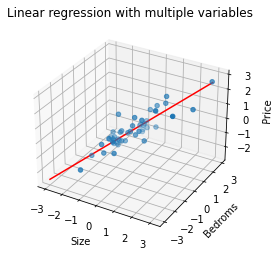

In [159]:
axis_x = np.arange(-3, 3, 0.1)
axis_y = np.arange(-3, 3, 0.1)

ax = plt.axes(projection ='3d')  
ax.scatter(normalized.Size, normalized.Bedrooms, normalized.Price)
ax.plot(axis_x, axis_y, theta[0, 0] + theta[1, 0] * axis_y + theta[2, 0] * axis_y, 'r')
ax.set_xlabel('Size')
ax.set_ylabel('Bedroms')
ax.set_zlabel('Price')
ax.set_title('Linear regression with multiple variables')
plt.show()

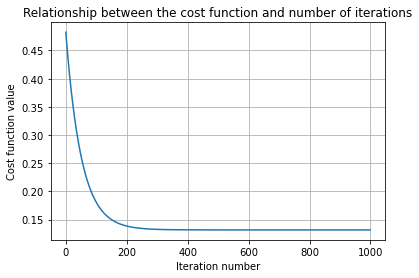

In [160]:
plt.plot(range(len(cost)), cost)
plt.title("Relationship between the cost function and number of iterations")
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.grid()
plt.show()

### Linear regression - Python packages

In [161]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Data import
path = os.getcwd() + '/ex1data2.txt'
data3 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
 
 
# Normalization
normalized = (data3 - data3.mean())/data3.std()

 
# Split into train and test sets (70-30%)
X = normalized[normalized.columns[:-1]]
y = normalized[normalized.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.35, random_state=0)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.7917168  0.04239971]
Residual sum of squares: 0.325793408914235
